In [1]:
import os
os.getcwd()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Shape: 1975 rows and 26 variables

Data types:
 study_id                                   int64
spinal_canal_stenosis_l1_l2               object
spinal_canal_stenosis_l2_l3               object
spinal_canal_stenosis_l3_l4               object
spinal_canal_stenosis_l4_l5               object
spinal_canal_stenosis_l5_s1               object
left_neural_foraminal_narrowing_l1_l2     object
left_neural_foraminal_narrowing_l2_l3     object
left_neural_foraminal_narrowing_l3_l4     object
left_neural_foraminal_narrowing_l4_l5     object
left_neural_foraminal_narrowing_l5_s1     object
right_neural_foraminal_narrowing_l1_l2    object
right_neural_foraminal_narrowing_l2_l3    object
right_neural_foraminal_narrowing_l3_l4    object
right_neural_foraminal_narrowing_l4_l5    object
right_neural_foraminal_narrowing_l5_s1    object
left_subarticular_stenosis_l1_l2          object
left_subarticular_stenosis_l2_l3          object
left_subarticular_stenosis_l3_l4          object
left_subarticular_ste

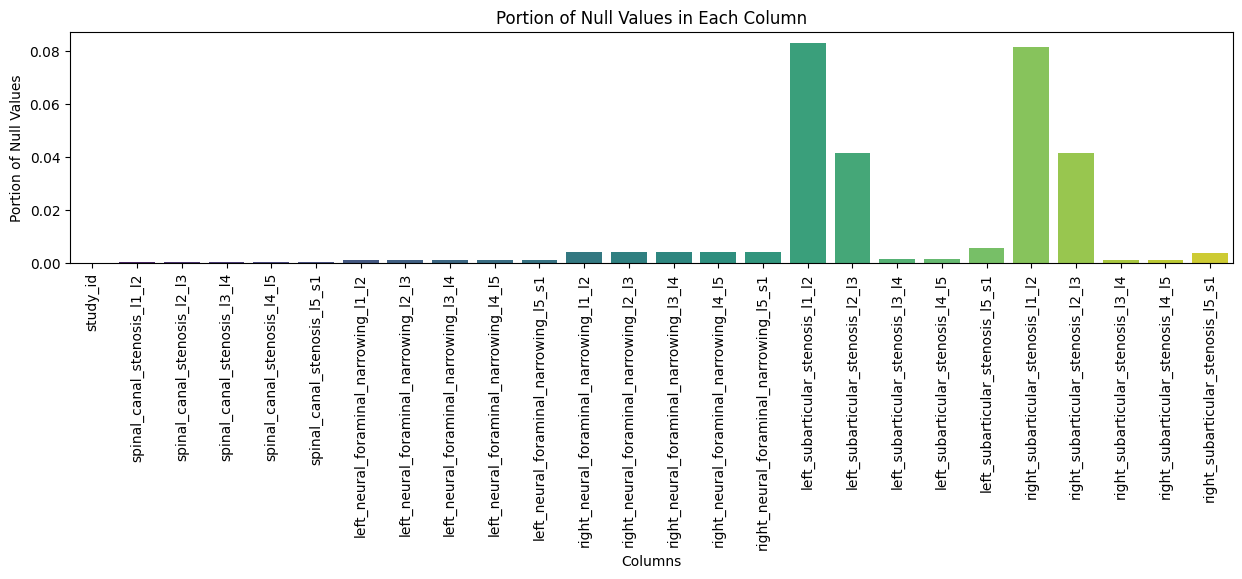

In [2]:
train_df = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv')

# Quick review general data
def descriptive_statistics(data):
    print("Shape:", data.shape[0], "rows and", data.shape[1], "variables")
    # print("\nVariable names:", data.columns)
    
    print("\nData types:\n", data.dtypes)
    
    # print("\nNull values portion:\n", data.isnull().sum() / data.shape[0])
    null_values_portion = data.isnull().sum() / data.shape[0]
    plt.figure(figsize=(15, 3))
    sns.barplot(x=null_values_portion.index, y=null_values_portion.values, palette='viridis')
    plt.title('Portion of Null Values in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Portion of Null Values')
    plt.xticks(rotation=90)
    plt.show()
    
    # Detect categorical and continuous variables
    categorical_columns = data.select_dtypes(include=['object']).columns
    continuous_columns = data.select_dtypes(include=['number']).columns
        
descriptive_statistics(train_df)

In [3]:
train_df.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


"Their" distribution of categories

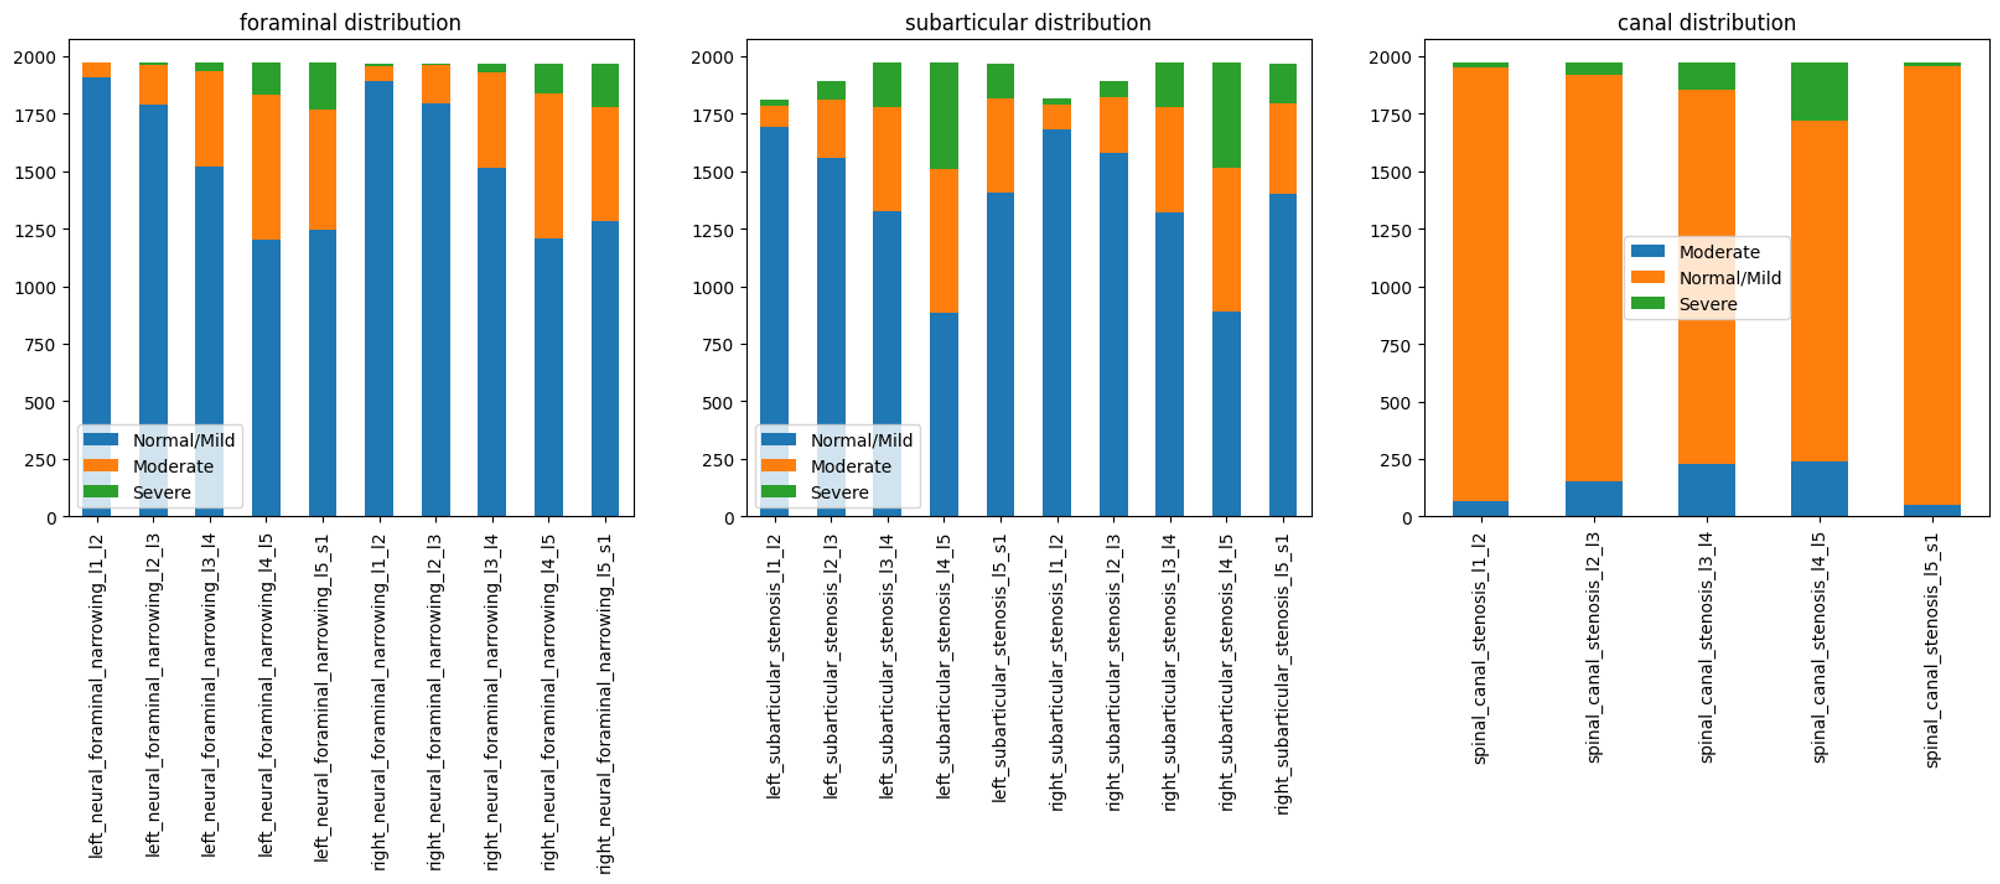

In [7]:
train_df[train_df.study_id == 4003253]

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
